In [6]:
import wget

In [7]:
wget.download("https://github.com/euphoris/datasets/raw/master/neurips.zip")

'neurips (1).zip'

In [8]:
import pandas as pd
df = pd.read_csv("neurips.zip")
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = TfidfVectorizer(stop_words="english",max_features=2000)

In [10]:
x = cv.fit_transform(df.abstract)

In [11]:
x

<3920x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 216854 stored elements in Compressed Sparse Row format>

In [32]:
words = cv.get_feature_names()

In [13]:
from sklearn.decomposition import TruncatedSVD

In [14]:
svd = TruncatedSVD(n_components=100,random_state=1234)

In [15]:
svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [16]:
word_idx = words.index("topic")
word_idx

1861

In [17]:
topic_idx = svd.components_[:,word_idx].argmax()
topic_idx

27

In [18]:
# loading 주제와 관련된 값.
topic = pd.DataFrame({"word":words,"loading":svd.components_[topic_idx]})
topic.sort_values("loading").tail()

,word,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


## 회전과 결과 해석

In [19]:
# 회전을 하기 위한 패키지 설치
!pip install factor_analyzer

In [20]:
from factor_analyzer.rotator import Rotator

In [21]:
rotator = Rotator()

In [22]:
# fit_transform은 단어가 행이고 주제가 열이어야한다. 그러나 svd는 단어가 열이고 주제가 행이기때문에 .T로 바꿔준다.
rot = rotator.fit_transform(svd.components_.T)

In [27]:
rot.shape

(2000, 100)

In [28]:
loading = rot.T

In [38]:
word_idx = words.index("topic")

In [39]:
from matplotlib import pyplot

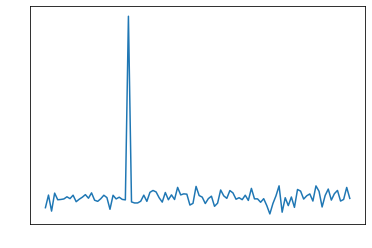

In [42]:
pyplot.tick_params(color = "white",colors = "white")
pyplot.plot(loading[:,word_idx])